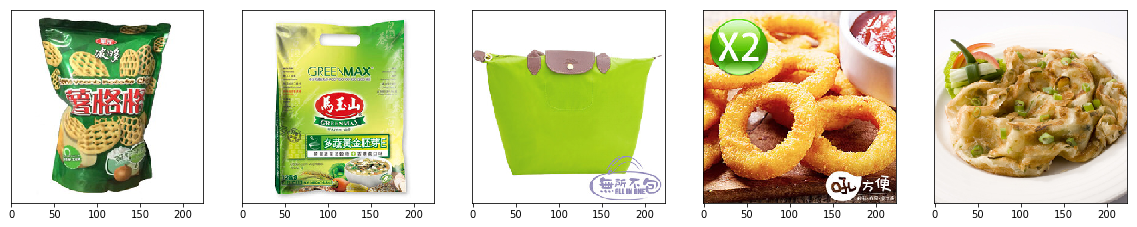

['n03871628-packet, 0.199', 'n03908618-pencil_box, 0.075', 'n03188531-diaper, 0.063']
['n03871628-packet, 0.980', 'n03958227-plastic_bag, 0.013', 'n04357314-sunscreen, 0.001']
['n04204238-shopping_basket, 0.580', 'n02909870-bucket, 0.161', 'n03709823-mailbag, 0.051']
['n07695742-pretzel, 0.934', 'n07693725-bagel, 0.017', 'n02776631-bakery, 0.012']
['n07831146-carbonara, 0.541', 'n07579787-plate, 0.187', 'n07583066-guacamole, 0.050']


In [2]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import keras.applications.vgg16 as vgg16
import numpy as np

imgs = [
    image.load_img("../../tmp/potato.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/greenmax.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/green_bag.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/onion_ring.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/scallion_pancake.jpg", target_size=(224, 224)) 
]

plt.figure(figsize=(20, 10))
for i, img in enumerate(imgs, start=1):
    plt.subplot(1, 5, i)
    axesImg = plt.imshow(img)
    axesImg.axes.get_yaxis().set_visible(False)
plt.show()

na_imgs = [ image.img_to_array(img) for img in imgs ]    
na_imgs = np.asarray(na_imgs)
na_pp_imgs = vgg16.preprocess_input(na_imgs)

model = vgg16.VGG16(weights='imagenet')
preds = model.predict(na_pp_imgs)
for topk in vgg16.decode_predictions(preds, top=3):
    print([ '{}-{}, {:.3f}'.format(t[0], t[1], t[2]) for t in topk ])

Found 28850 images belonging to 10 classes.
{0: 'n03871628-packet', 1: 'n04204238-shopping_basket', 2: 'n04476259-tray', 3: 'n04542943-waffle_iron', 4: 'n07565083-menu', 5: 'n07579787-plate', 6: 'n07695742-pretzel', 7: 'n07697313-cheeseburger', 8: 'n07697537-hotdog', 9: 'n07831146-carbonara'}
(5, 224, 224, 3)


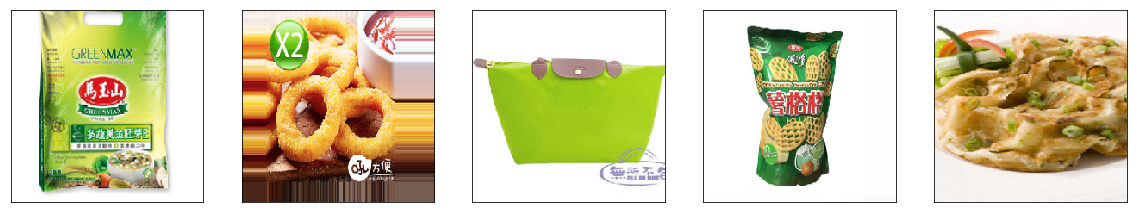

['n15075141-toilet_tissue, 0.082']
['n03788365-mosquito_net, 0.115']
['n03788365-mosquito_net, 0.097']
['n15075141-toilet_tissue, 0.108']
['n03788365-mosquito_net, 0.092']

n03871628-packet
n07695742-pretzel
n04204238-shopping_basket
n03871628-packet
n07579787-plate


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

imgs = [
    image.load_img("../../tmp/potato.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/greenmax.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/green_bag.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/onion_ring.jpg", target_size=(224, 224)),
    image.load_img("../../tmp/scallion_pancake.jpg", target_size=(224, 224)) 
]
na_imgs = [ image.img_to_array(img) for img in imgs ]
na_imgs = np.asarray(na_imgs)

i2class_dic = {}
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.5,
    fill_mode='nearest'
)
train_gen = datagen.flow_from_directory("../image_search/data_sub/train/", batch_size=1)
for k, v in train_gen.class_indices.iteritems():
    i2class_dic[v] = k
print i2class_dic


import keras.applications.vgg16 as vgg16
import keras.layers as layers
from keras.models import Model

m_vgg16 = vgg16.VGG16(weights='imagenet')
base_model = vgg16.VGG16(include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = layers.Flatten(name='flatten')(x)
x = layers.Dense(256, activation='relu', name='fc1')(x)
x = layers.Dense(256, activation='relu', name='fc2')(x)
predictions = layers.Dense(10, activation='softmax', name='predictions')(x)
m_aug = Model(inputs=base_model.input , outputs=predictions)
m_aug.load_weights('../image_search/data_sub.1step.block5.fc-u256.aug.h5')

plt.figure(figsize=(20, 10))
for augImgs in datagen.flow(na_imgs, batch_size=5):
    print augImgs.shape
    
    for i in range(augImgs.shape[0]):
        plt.subplot(1, 5, i + 1)
        fig = plt.imshow(augImgs[i])
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    plt.show()
    
    preds = m_vgg16.predict(augImgs)
    for topk in vgg16.decode_predictions(preds, top=1):
        print([ '{}-{}, {:.3f}'.format(t[0], t[1], t[2]) for t in topk ])
    
    print
    preds = m_aug.predict(augImgs)
    topI = preds.argmax(axis=-1)
    for i in topI:
        print i2class_dic[i]

    break

## Image Retrieval with Feature Vector
### Accurate classification model

In [ ]:
#TODO...

### Autoencoder model

load ../image_search/feavct_data_sub.vgg16.fc2/feavct_data_sub.vgg16.fc2.0.feas.npy ...
load ../image_search/feavct_data_sub.vgg16.fc2/feavct_data_sub.vgg16.fc2.0.bns.npy ...
calculate norm for each image feature vecture ...
[  71.27200317   81.41122437   90.71953583 ...,  107.55152893  100.40232849
  106.35415649]
[WARN] feature datasets are not found, ../image_search/feavct_data_sub.vgg16.fc2/feavct_data_sub.vgg16.fc2.1.bns.npy ../image_search/feavct_data_sub.vgg16.fc2/feavct_data_sub.vgg16.fc2.1.feas.npy
load feature dataset: 0 secs
original H and W: 224, 224
resized H and W: 224, 224
predicted by custom model
Predicted (1, 4096):[ 0.          0.          1.56714439 ...,  4.13525057  0.          0.        ]
(1, 4096)
img2feavct: 0 secs
['1243049_L.jpg', '4322621_L.jpg', '4540398_L.jpg', '5045908_L.jpg', '4819449_L.jpg', '4322611_L.jpg', '3945640_L.jpg', '3945638_L.jpg', '3945639_L.jpg', '4699950_L.jpg', '5002762_L.jpg', '4623257_L.jpg', '5156606_L.jpg', '5156607_L.jpg', '4322607_L.j

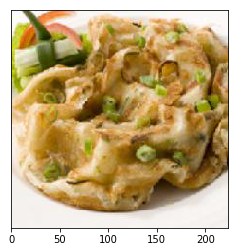

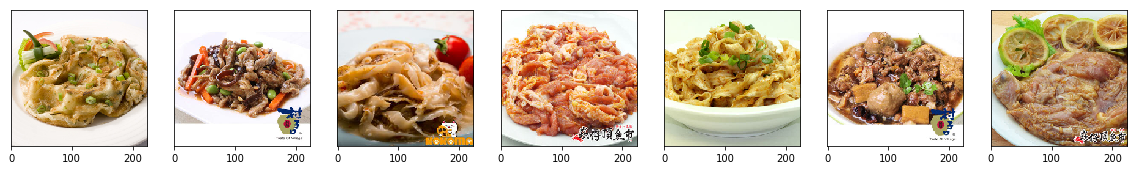

In [8]:
from sim_imgs_flat_model import load_fea_dataset, load_model_arch_weight, search_sim_images
from keras.preprocessing import image
import matplotlib.pyplot as plt

#fp_testimg = '../../tmp/potato.jpg'
#fp_testimg = '../../tmp/greenmax.jpg'
fp_testimg = '../image_search/tmp_train_aug/_11_922887.jpeg'
imgFea1Ds_list, normImgFea1Ds_list, imgBNs_list = load_fea_dataset('../image_search/feavct_data_sub.vgg16.fc2')
model = load_model_arch_weight('../image_search/vgg16.fc2.json','../image_search/vgg16.fc2.h5')

simImgFNs = search_sim_images(fp_testimg, (imgFea1Ds_list, normImgFea1Ds_list, imgBNs_list), model)

axesImg = plt.imshow(image.load_img(fp_testimg, target_size=(224, 224)))
axesImg.axes.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 10))
for i in range(7):
    plt.subplot(1, 7, i+1)
    axesImg = plt.imshow(image.load_img('../../tmp/sub_data_img/{}'.format(simImgFNs[i]), target_size=(224, 224)))
    axesImg.axes.get_yaxis().set_visible(False)
plt.show()

load ../image_search/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5.0.feas.npy ...
load ../image_search/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5.0.bns.npy ...
calculate norm for each image feature vecture ...
[ 466.64416504  306.85348511   84.00910187 ...,  250.48065186   91.53101349
   67.97904968]
[WARN] feature datasets are not found, ../image_search/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5.1.bns.npy ../image_search/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5.1.feas.npy
load feature dataset: 0 secs


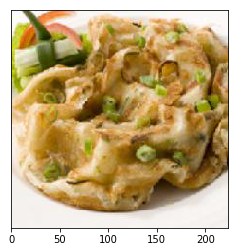

original H and W: 224, 224
resized H and W: 224, 224
predicted by custom model
Predicted (1, 4096):[ 0.          0.          2.31836748 ...,  0.          0.          0.58349055]
(1, 4096)
img2feavct: 0 secs
['4618159_L.jpg', '3103740_L.jpg', '5298529_L.jpg', '4478159_L.jpg', '4648352_L.jpg', '5168016_L.jpg', '2779564_L.jpg', '4924439_L.jpg', '4206551_L.jpg', '5327655_L.jpg', '4615926_L.jpg', '1993754_L.jpg', '3156398_L.jpg', '2589825_L.jpg', '2169843_L.jpg', '3480796_L.jpg', '5181058_L.jpg', '5181057_L.jpg', '4243218_L.jpg', '4243220_L.jpg']
cosine similarity: 0 secs


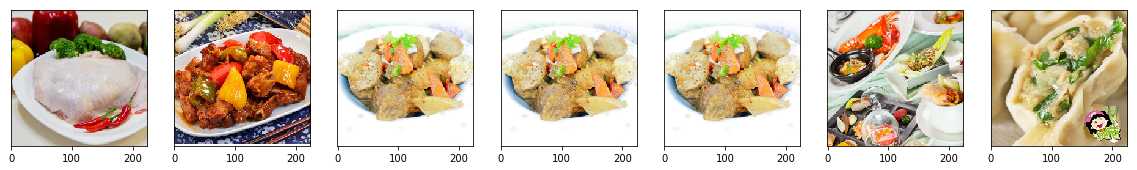

In [9]:
from sim_imgs_flat_model import load_fea_dataset, load_model_arch_weight, search_sim_images
import keras.applications.vgg16 as vgg16
import keras.layers as layers
from keras.preprocessing import image
from keras.models import Model
from keras.models import model_from_json
import matplotlib.pyplot as plt

imgFea1Ds_list, normImgFea1Ds_list, imgBNs_list = load_fea_dataset('../image_search/feavct_data_sub.aug.autoencoder.block5.fc2-u4096.h5')
encoder_model = load_model_arch_weight('../image_search/data_sub.aug.autoencoder.block5.fc2-u4096.json', '../image_search/data_sub.aug.autoencoder.block5.fc2-u4096.h5')
    
axesImg = plt.imshow(image.load_img(fp_testimg, target_size=(224, 224)))
axesImg.axes.get_yaxis().set_visible(False)
plt.show()

simImgFNs = search_sim_images(fp_testimg, (imgFea1Ds_list, normImgFea1Ds_list, imgBNs_list), encoder_model)
plt.figure(figsize=(20, 10))
for i in range(7):
    plt.subplot(1, 7, i+1)
    axesImg = plt.imshow(image.load_img('../../tmp/sub_data_img/{}'.format(simImgFNs[i]), target_size=(224, 224)))
    axesImg.axes.get_yaxis().set_visible(False)
plt.show()